In [1]:
from validate_with_real import *
%load_ext autoreload
%autoreload 2


In [2]:
c=load_ground_truth(model_path="/Users/sarahurbut/Dropbox/resultshighamp/results/output_0_10000/model.pt")


/Users/sarahurbut/aladynoulli2/pyScripts/validate_with_real.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


In [3]:
ref_trajectories =torch.load("/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt")
from scipy.stats import norm
si_refs = ref_trajectories['signature_refs']

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_1696/2193323617.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ref_trajectories =torch.load("/Users/sarahurbu

In [5]:
from new_clust import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
N=10000
D=348
T=c['Y'].shape[2]
K=si_refs.shape[0]
P=c['G'].shape[1]
print(P)
print(K)
print(D)
print(T)
print(N)


36
20
348
52
10000


In [13]:
real_psi=c['model_state_dict']['psi'].detach().numpy()

In [ ]:
generate_clustered_survival_data_from_real()

In [48]:
from new_clust import *
sim_data = generate_clustered_survival_data_from_real(N,D,T,K,P,
                                                      G=c['G'],
                                                      real_signature_refs=si_refs,
                                                      real_logit_prev_t=c['logit_prevalence_t'],
                                                      real_gamma=c['model_state_dict']['gamma'],
                                                      real_psi=real_psi,
                                                      init_sd_scaler=1e-2,
                                                      signature_scale=0,
                                                      use_fixed_psi=True)

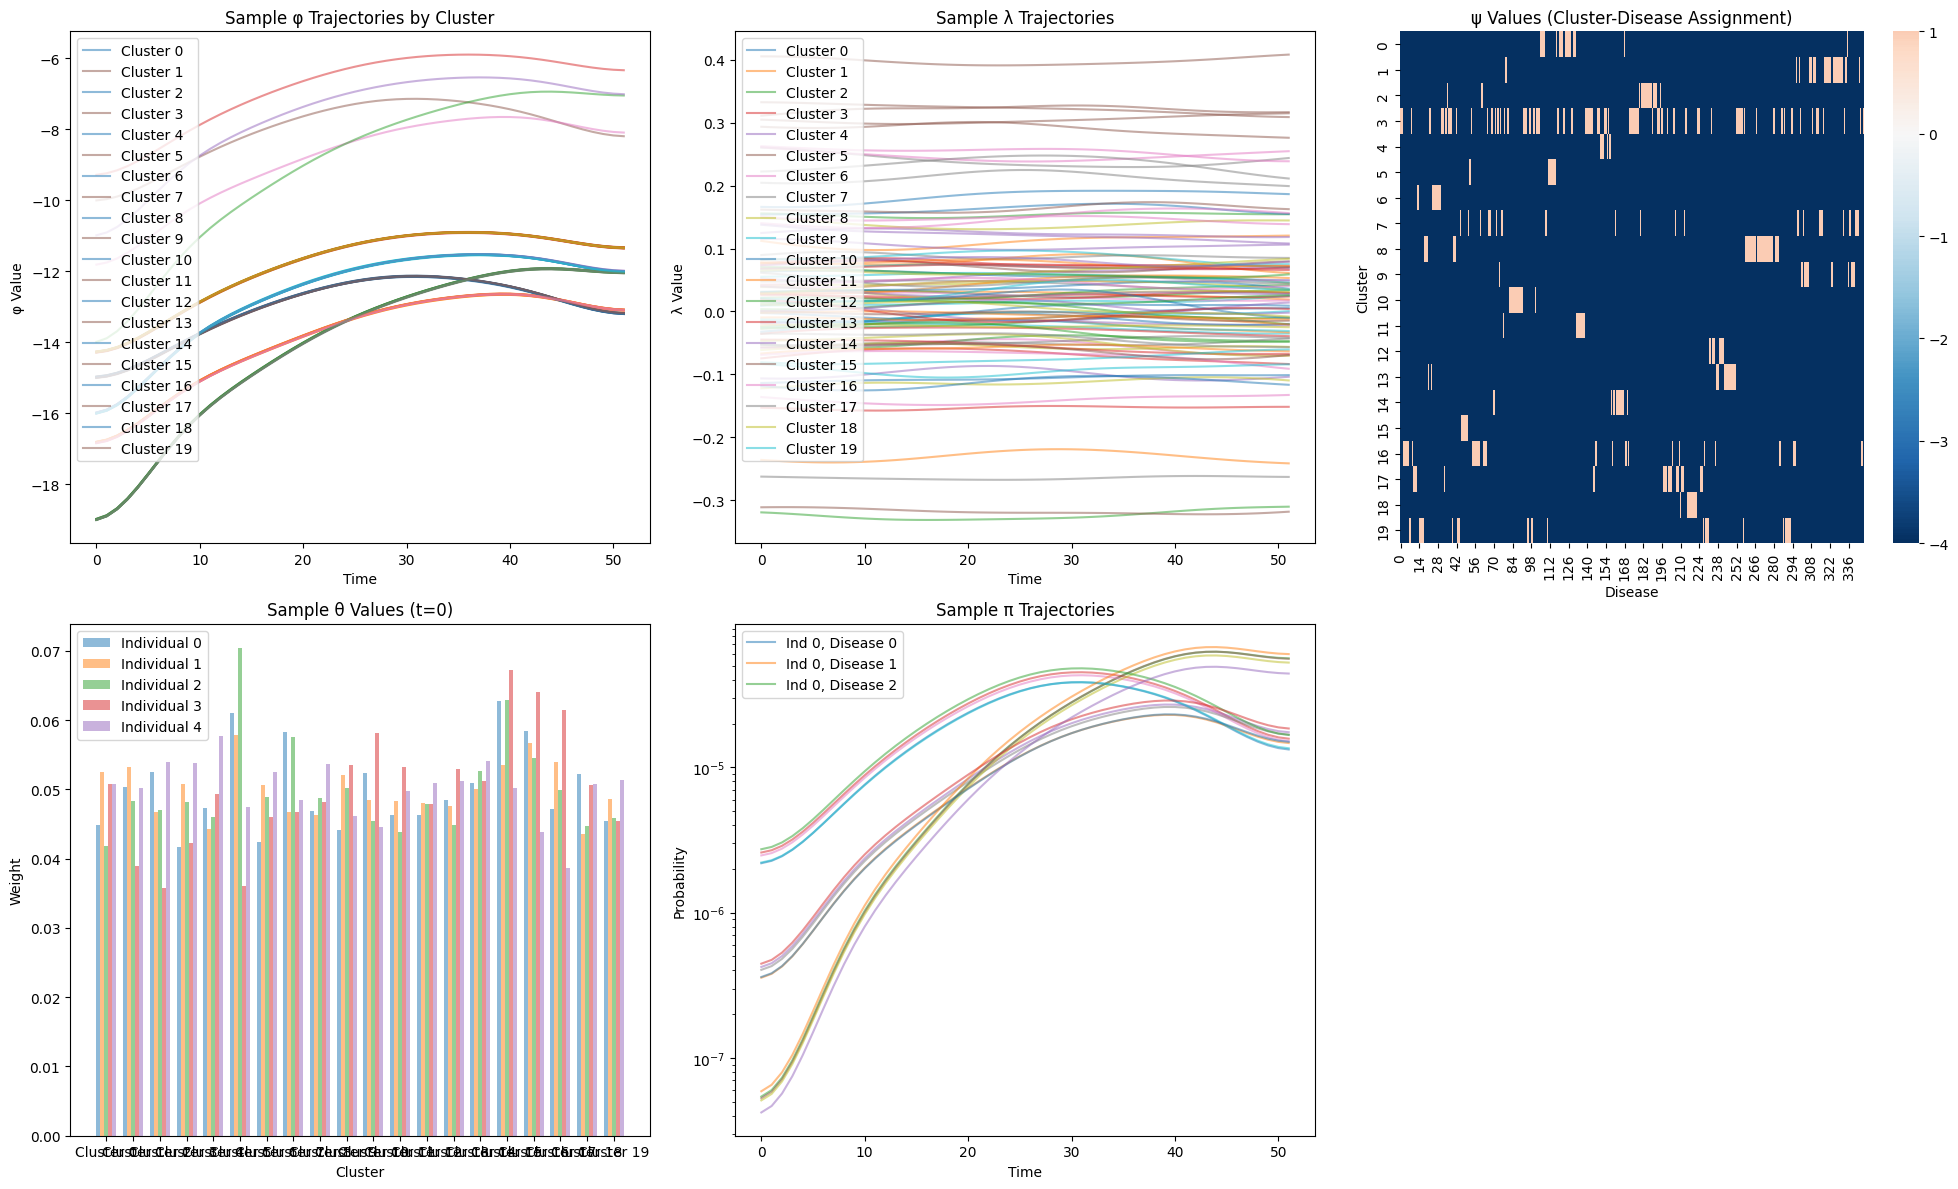

/Users/sarahurbut/aladynoulli2/pyScripts/plotting.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


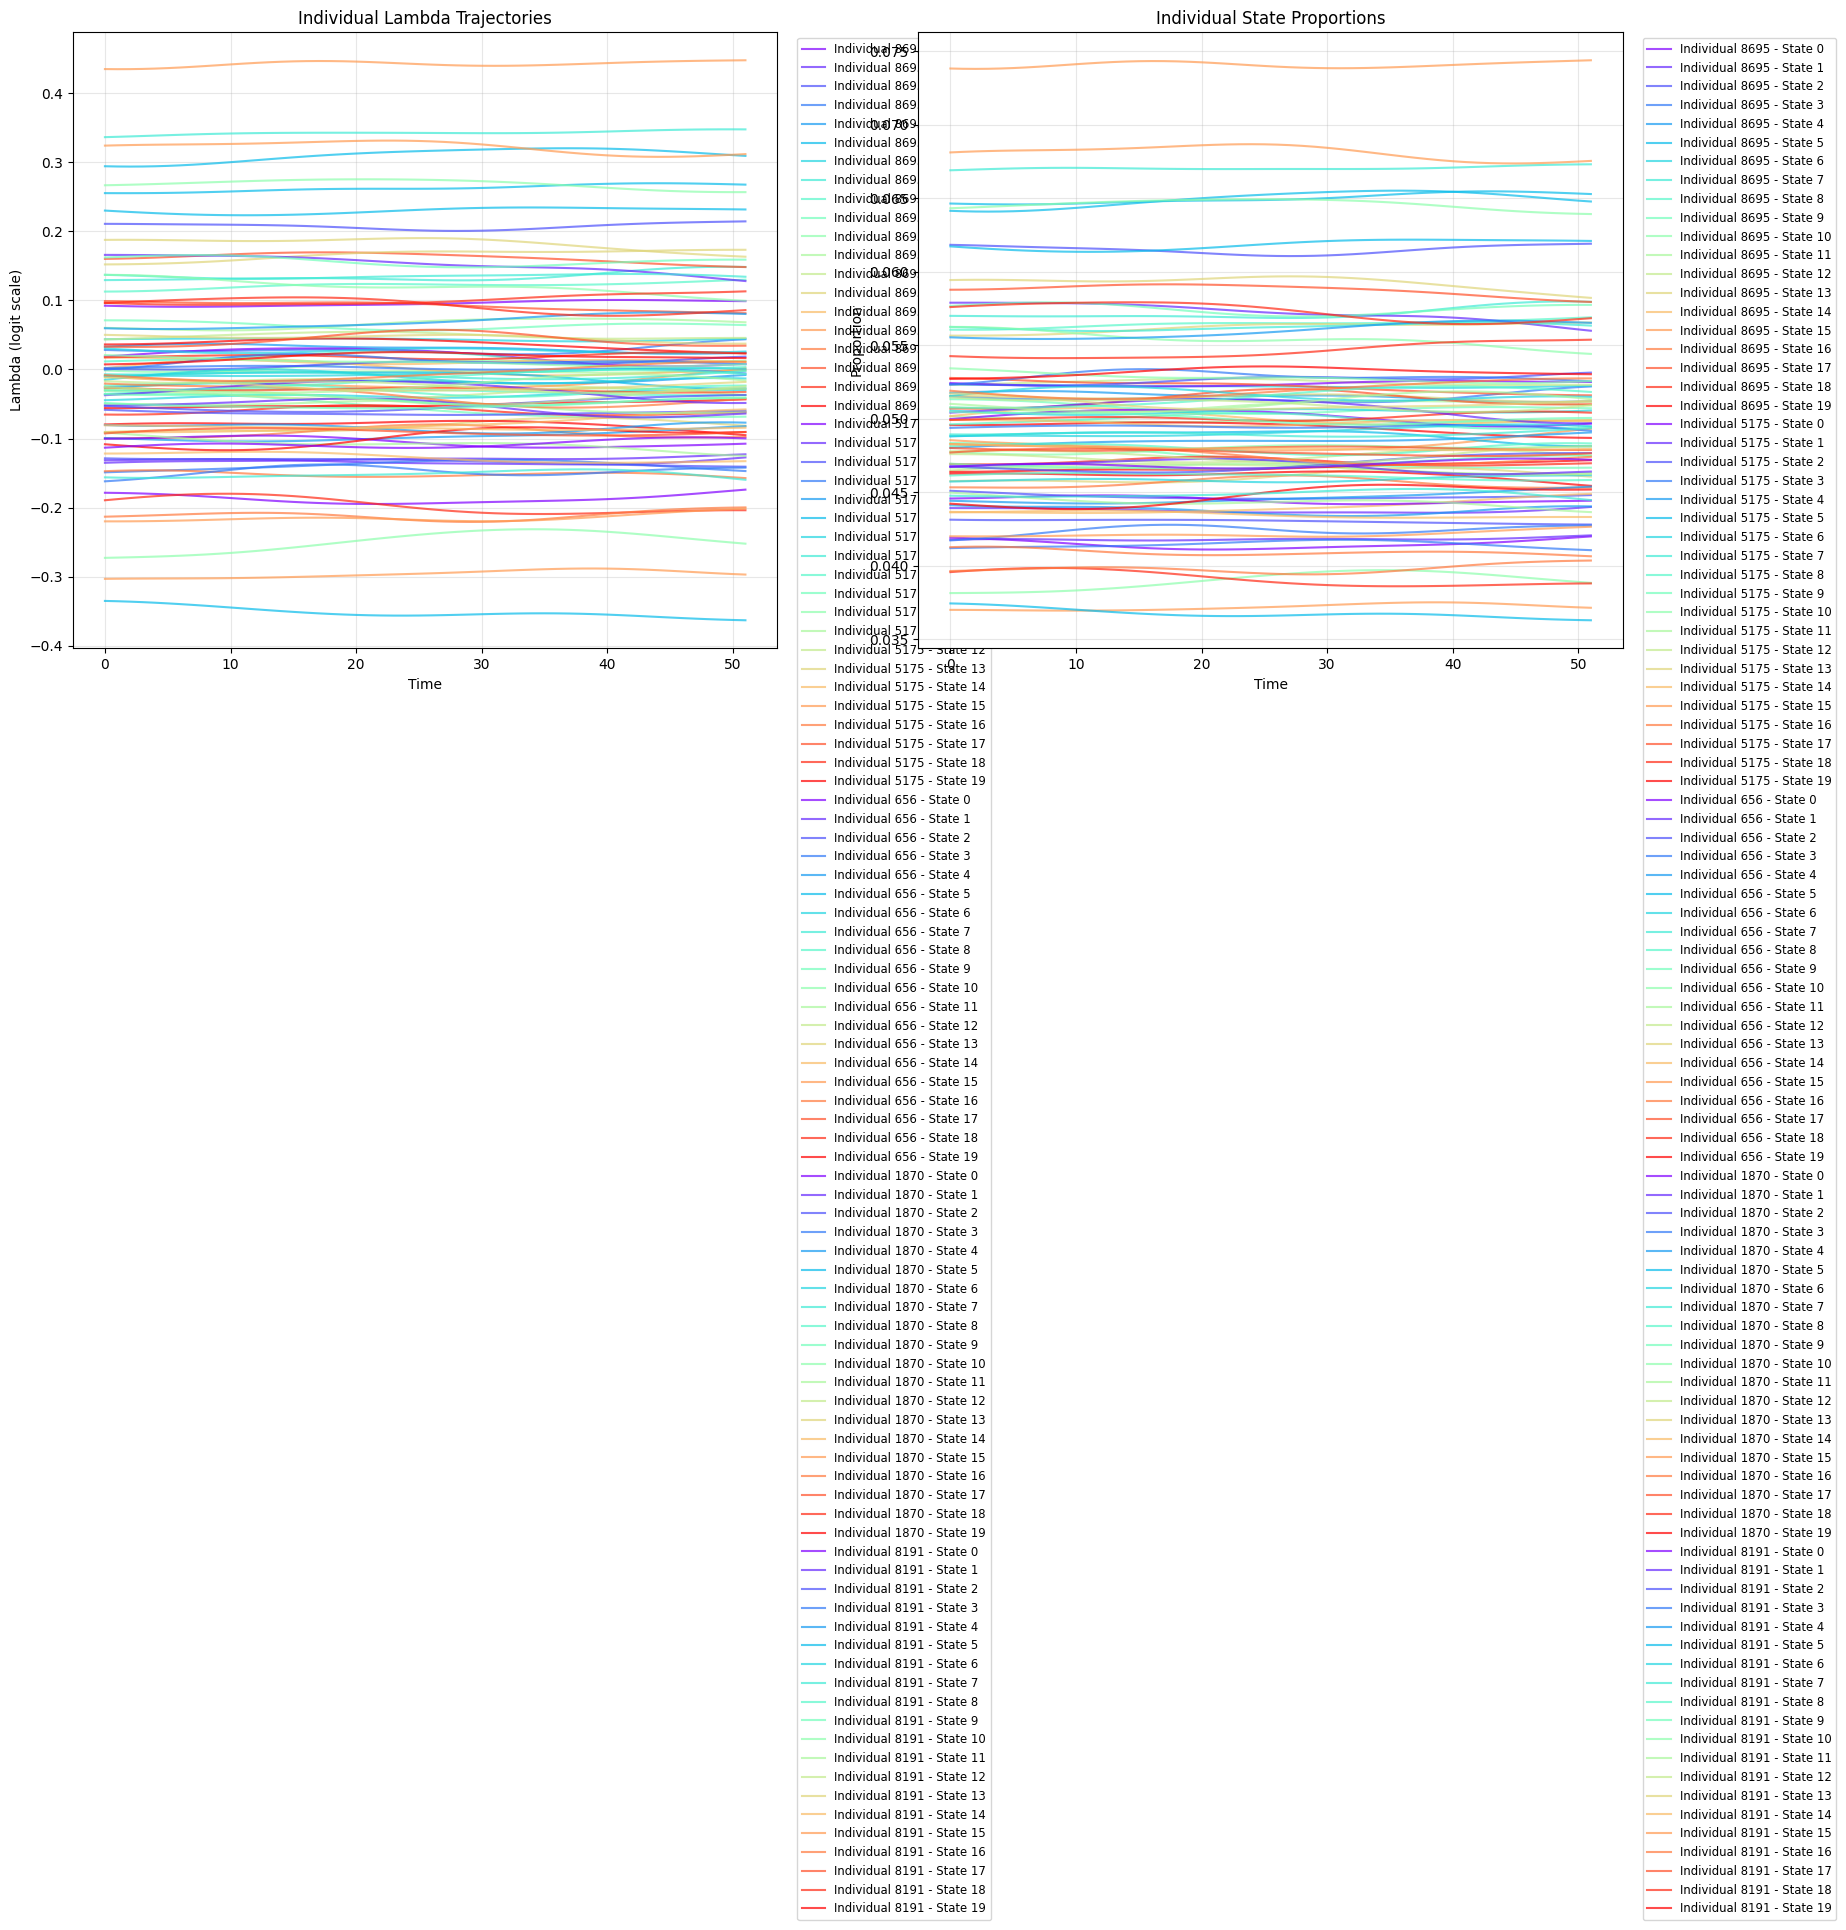

In [49]:
from plotting import *
plot_synthetic_components(sim_data)
plot_individual_trajectories(sim_data, n_individuals=5)



In [50]:
# Import the class from clust_huge_amp
from clust_huge_amp import AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest


# 3. Reinitialize model with the estimated references
# First compute smoothed prevalence
smoothed_prev = compute_smoothed_prevalence(sim_data['Y'], window_size=5)


In [51]:
print(P)
print(K)
print(D)
print(T)
print(N)


36
20
348
52
10000


In [52]:

initial_model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=N, D=D, T=T, K=K, P=P,
    G=sim_data['G'], 
    Y=torch.tensor(sim_data['Y'], 
                   dtype=torch.float32),
    R=0.0,  # No LRT penalty
    W=0.01,  # Low GP weight to be responsive
    prevalence_t=smoothed_prev,
    init_sd_scaler=1e-2,  # Smaller to stay closer to mean
    genetic_scale=1.0,
    flat_lambda=True,
    healthy_reference=None
)


/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.G = torch.tensor(G_scaled, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/u


Cluster Sizes:
Cluster 0: 17 diseases
Cluster 1: 8 diseases
Cluster 2: 16 diseases
Cluster 3: 11 diseases
Cluster 4: 35 diseases
Cluster 5: 40 diseases
Cluster 6: 15 diseases
Cluster 7: 16 diseases
Cluster 8: 6 diseases
Cluster 9: 39 diseases
Cluster 10: 7 diseases
Cluster 11: 22 diseases
Cluster 12: 6 diseases
Cluster 13: 16 diseases
Cluster 14: 9 diseases
Cluster 15: 43 diseases
Cluster 16: 10 diseases
Cluster 17: 5 diseases
Cluster 18: 7 diseases
Cluster 19: 20 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 17
Base value (first 5): tensor([-18.4207, -18.4207, -18.4207, -18.4207, -18.4207])
Base value centered (first 5): tensor([-0.0858, -0.0858, -0.0858, -0.0858, -0.0858])
Base value centered mean: 2.091407850457472e-06
Gamma init for k=0 (first 5): tensor([-0.0047, -0.0011, -0.0009, -0.0009, -0.0071])

Calculating gamma for k=1:
Number of diseases in cluster: 8
Base value (first 5): tensor([-18.4207, -18.4207, -18.4207, -18.4207, -18.4207])
Base value centered

In [61]:

# Get initial clusters
initial_clusters = initial_model.clusters

# Create confusion matrix between initial clusters and true clusters
from sklearn.metrics import confusion_matrix
import seaborn as sns




In [54]:
initial_model.D

348

In [55]:
c['model_state_dict']['psi'].shape

torch.Size([21, 348])

In [56]:
sim_data['clusters']

array([ 3,  3, 16, 16, 16, 16, 16, 19,  3, 16, 17, 17, 17,  6, 19, 19, 19,
       19,  8,  8,  8, 13,  3, 13,  6,  6,  6,  6,  6,  6,  6,  3,  3, 17,
        3,  2,  3,  3,  3, 19,  8,  8,  3, 19, 19,  7, 15, 15, 15, 15, 15,
        7,  5,  3, 16, 16, 16, 16, 16, 16,  7,  2, 16, 16, 16,  3,  7,  7,
        3,  3, 14,  3,  7,  3,  9,  3,  7, 11,  3,  1,  3,  3, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10,  3,  3,  3, 19, 19,  3, 19, 19,  3, 10,
        3,  3,  3,  0,  0,  0,  0,  7, 19,  5,  5,  5,  5,  5,  5,  0,  3,
        0,  0,  0,  3,  3,  0,  0,  0,  0,  3,  3,  0,  0, 11, 11, 11, 11,
       11, 11, 11,  3,  3,  3,  3,  3,  3, 17, 16, 16,  3,  3,  4,  4,  4,
        3,  3,  4,  3,  4, 14, 16, 14,  7, 14, 14, 14, 14, 14, 14,  0, 16,
       14, 16,  3,  3,  3,  3,  3,  3,  3,  2,  7,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  3,  3,  2,  3, 17, 17, 17,  3, 17, 17, 17,
       16,  3,  7, 17, 17, 16, 18, 17, 17,  7,  3, 18, 18, 18, 18, 18, 18,
       18, 18,  3,  3, 17

In [69]:
from new_clust import *
plot_aligned_confusion_matrix(sim_data['clusters'], initial_clusters, 20)

NameError: name 'plot_aligned_confusion_matrix' is not defined

In [58]:
from plotting import *
analyze_disease_clusters(sim_data['clusters'],c['disease_names'])

Disease Cluster Analysis:
------------------------

Cluster 0 (Size: 16):
  - [np.str_('Aortic valve disease')]
  - [np.str_('Atrial fibrillation and flutter')]
  - [np.str_('Cardiomegaly')]
  - [np.str_('Congenital anomalies of great vessels')]
  - [np.str_('Congestive heart failure (CHF) NOS')]
  - [np.str_('Disease of tricuspid valve')]
  - [np.str_('Heart failure NOS')]
  - [np.str_('Left bundle branch block')]
  - [np.str_('Mitral valve disease')]
  - [np.str_('Other forms of chronic heart disease')]
  - [np.str_('Paroxysmal supraventricular tachycardia')]
  - [np.str_('Paroxysmal ventricular tachycardia')]
  - [np.str_('Pericarditis')]
  - [np.str_('Pleurisy; pleural effusion')]
  - [np.str_('Primary/intrinsic cardiomyopathies')]
  - [np.str_('Rheumatic disease of the heart valves')]

Cluster 1 (Size: 21):
  - [np.str_('Acquired toe deformities')]
  - [np.str_('Arthropathy NOS')]
  - [np.str_('Enthesopathy')]
  - [np.str_('Hallux rigidus')]
  - [np.str_('Hallux valgus (Bunion)')]

In [73]:
sim_data['psi'][:,0]

array([-4., -4., -4.,  1., -4., -4., -4., -4., -4., -4., -4., -4., -4.,
       -4., -4., -4., -4., -4., -4., -4.])

In [65]:
from plotting import *
analyze_disease_clusters(initial_clusters,c['disease_names'])


Disease Cluster Analysis:
------------------------

Cluster 0 (Size: 17):
  - [np.str_('Acute appendicitis')]
  - [np.str_('Arthropathy NOS')]
  - [np.str_('Carbuncle and furuncle')]
  - [np.str_('Cervicitis and endocervicitis')]
  - [np.str_('Coronary atherosclerosis')]
  - [np.str_('Diverticulosis')]
  - [np.str_('Esophageal bleeding (varices/hemorrhage)')]
  - [np.str_('Hypopotassemia')]
  - [np.str_('Inflammatory and toxic neuropathy')]
  - [np.str_('Ingrowing nail')]
  - [np.str_('Malignant neoplasm of ovary')]
  - [np.str_('Osteoarthrosis, localized, primary')]
  - [np.str_('Other diseases of respiratory system, NEC')]
  - [np.str_('Other disorders of bladder')]
  - [np.str_('Pain in limb')]
  - [np.str_('Peripheral vascular disease, unspecified')]
  - [np.str_('Unstable angina (intermediate coronary syndrome)')]

Cluster 1 (Size: 8):
  - [np.str_('Abdominal aortic aneurysm')]
  - [np.str_('Enthesopathy')]
  - [np.str_('Other inflammatory spondylopathies')]
  - [np.str_('Other lo

In [66]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, v_measure_score

def evaluate_clustering(true_clusters, pred_clusters):
    ari = adjusted_rand_score(true_clusters, pred_clusters)
    nmi = normalized_mutual_info_score(true_clusters, pred_clusters)
    v_score = v_measure_score(true_clusters, pred_clusters)
    
    print(f"Adjusted Rand Index: {ari:.3f}")
    print(f"Normalized Mutual Information: {nmi:.3f}")
    print(f"V-measure: {v_score:.3f}")

In [74]:
import numpy as np
from scipy.special import softmax, expit
from new_clust import generate_state_driven_data

# Use dimensions similar to real data
N = 1000  # number of individuals
D = 348   # number of diseases
T = 50    # time points
K = 20    # number of states
P = 10    # genetic components

print("Generating state-driven synthetic data...")
print(f"N={N}, D={D}, T={T}, K={K}, P={P}")

# Generate data
sim_data = generate_state_driven_data(N, D, T, K, P)

Generating state-driven synthetic data...
N=1000, D=348, T=50, K=20, P=10


In [76]:
# Import the class from clust_huge_amp
from clust_huge_amp import AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest


# 3. Reinitialize model with the estimated references
# First compute smoothed prevalence
smoothed_prev = compute_smoothed_prevalence(sim_data['Y'], window_size=5)


initial_model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=N, D=D, T=T, K=K, P=P,
    G=sim_data['G'], 
    Y=torch.tensor(sim_data['Y'], 
                   dtype=torch.float32),
    R=0.0,  # No LRT penalty
    W=0.01,  # Low GP weight to be responsive
    prevalence_t=smoothed_prev,
    init_sd_scaler=1e-2,  # Smaller to stay closer to mean
    genetic_scale=1.0,
    flat_lambda=True,
    healthy_reference=None
)

/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b



Cluster Sizes:
Cluster 0: 19 diseases
Cluster 1: 15 diseases
Cluster 2: 29 diseases
Cluster 3: 22 diseases
Cluster 4: 8 diseases
Cluster 5: 25 diseases
Cluster 6: 20 diseases
Cluster 7: 21 diseases
Cluster 8: 17 diseases
Cluster 9: 20 diseases
Cluster 10: 19 diseases
Cluster 11: 8 diseases
Cluster 12: 15 diseases
Cluster 13: 15 diseases
Cluster 14: 17 diseases
Cluster 15: 15 diseases
Cluster 16: 19 diseases
Cluster 17: 19 diseases
Cluster 18: 11 diseases
Cluster 19: 14 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 19
Base value (first 5): tensor([-18.4207, -17.6560, -18.4207, -16.1267, -16.8913])
Base value centered (first 5): tensor([-1.1378, -0.3732, -1.1378,  1.1562,  0.3915])
Base value centered mean: -7.658004506083671e-07
Gamma init for k=0 (first 5): tensor([-0.0513, -0.0386,  0.0188, -0.0388,  0.0128])

Calculating gamma for k=1:
Number of diseases in cluster: 15
Base value (first 5): tensor([-17.4521, -16.4835, -18.4207, -17.4521, -16.4835])
Base value c

In [77]:
initial_clusters = initial_model.clusters

In [78]:
evaluate_clustering(sim_data['clusters'], initial_clusters)

Adjusted Rand Index: 0.668
Normalized Mutual Information: 0.785
V-measure: 0.785



Clustering Metrics:
Adjusted Rand Index: 0.668
Normalized Mutual Information: 0.785


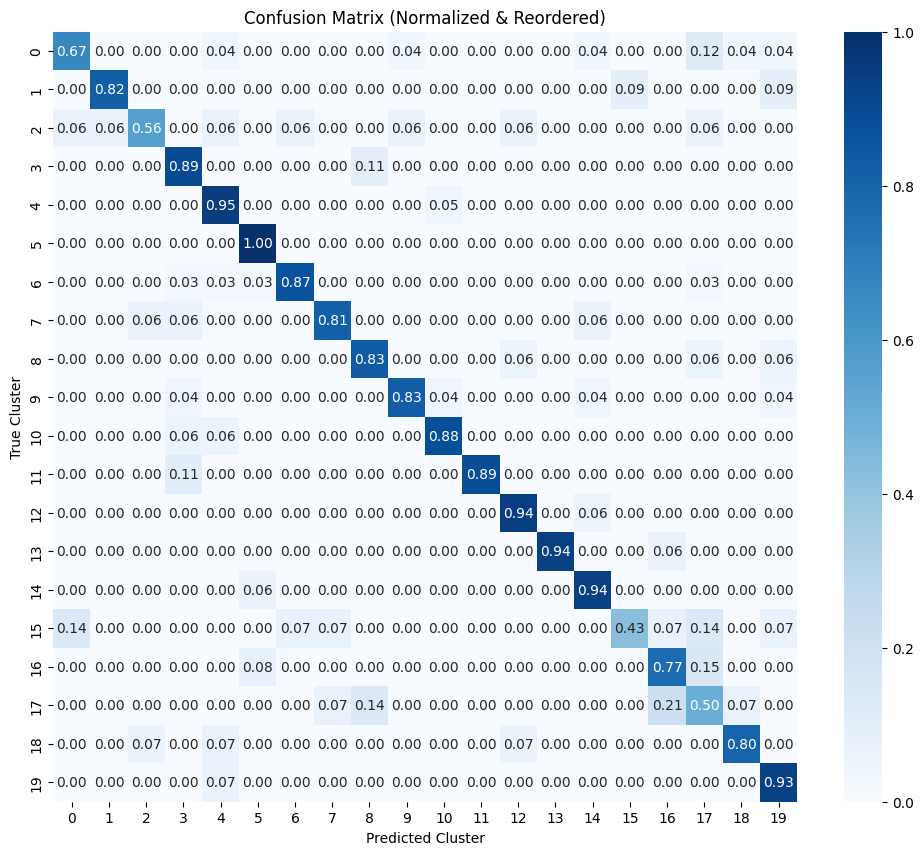

array([ 0, 16, 18,  3,  5, 12,  2, 15, 17,  7,  8,  4,  6, 13, 10, 11,  1,
       14, 19,  9])

In [84]:
from analyze_clusters import *
plot_confusion_matrix(sim_data['clusters'], initial_clusters, K=20) 

In [264]:
Y_tensor = torch.tensor(Y, dtype=torch.float32)

# 2. Create reference trajectories
signature_refs, healthy_ref = create_reference_trajectories(
    Y=Y_tensor, 
    initial_clusters=initial_model.clusters,  # Use clusters from first initialization
    K=K, 
    healthy_prop=0.01, 
    frac=0.3
)


In [ ]:
plot_confusion_matrix(true_clusters, pred_clusters, K=20) 

In [ ]:
from clust_huge_amp import *
# Now initialize new model with references
model_with_refs = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=sim_data['G'].shape[0], 
    D=sim_data['Y'].shape[1], 
    T=sim_data['Y'].shape[2], 
    K=sim_data['signature_refs'].shape[0], 
    P=sim_data['G'].shape[1], 
    G=sim_data['G'], 
    Y=sim_data['Y'],
    prevalence_t=sim_data[''],  # Use smoothed prevalence
    R=0,  # As per your previous settings
    W=0.01,  # Low weight as discussed
    init_sd_scaler=1e-2,  # As per your previous settings
    genetic_scale=1.0,
    signature_references=sim_data['signature_refs'],  # Convert back to numpy for initialization
    disease_names=disease_names if 'disease_names' in locals() else None
)

In [ ]:
model_with_refs.visualize_initialization()

In [ ]:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=Y_100k.shape[0], 
    D=Y_100k.shape[1], 
    T=Y_100k.shape[2], 
    K=20,
    P=G_100k.shape[1],
    init_sd_scaler=1e-1,
    G=G_100k, 
    Y=Y_100k,
    genetic_scale=1,
    W=0.0001,
    R=0,
    prevalence_t=essentials['prevalence_t'],
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
    disease_names=essentials['disease_names']
)

torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters
# Verify clusters match
clusters_match = np.array_equal(initial_clusters, model.clusters)
print(f"\nClusters match exactly: {clusters_match}")

In [ ]:
from signature_recovery_sim import *